#Aprendizaje Supervisado

Tenemos un conjunto de datos de quienes sobreviven y de quienes no sobreviven en el titanic.
Queremos entrenar un modelo para posteriormente predecir, con otro conjunto de datos, la supervivencia.

##Importamos las librerías necesarias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv("train.csv")

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##Tratamiento de datos faltantes
Sustituir valores faltantes mediante alguna técnica se le llama imputación

In [6]:
def datosfaltantes(data):
  #Visualización de barras para datos faltantes
  total = data.isnull().sum().sort_values(ascending=False) #pide la suma de los valores que son nulos en orden descendiente
  percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False) #operación que crea el porcentaje. ordena de mayor a menor
  ms = pd.concat([total, percent], axis=1, keys=["Total","Percent"]) #crea la tablita encima de la gráfica. axis = 1 es para definir que el total y percent es en columna
  ms = ms[ms["Percent"]>0]

  f,ax = plt.subplots(figsize=[8,6]) #tamaño de la gráfica
  plt.xticks(rotation=90) #rotación de los labels de las columnas
  fig = sns.barplot(x=ms.index, y=ms["Percent"],color="green",alpha=0.8) #describe como será la tabla. alpha es transparencia
  plt.xlabel("Features",fontsize=15)
  plt.ylabel("Percent of missing values",fontsize=15)
  plt.title("Percent missing data by feature",fontsize=15)
  return ms #regresar ms



,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


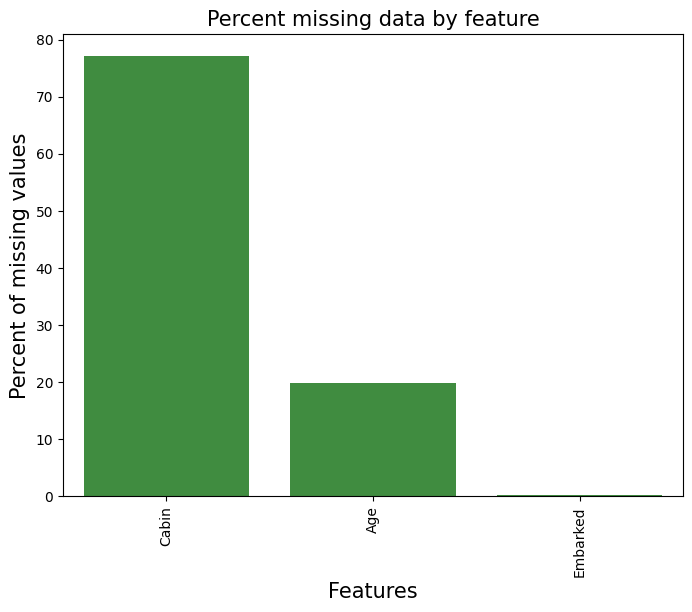

In [7]:
datosfaltantes(train_df)

In [8]:
#borrar columna de cabin
drop_column = ["Cabin"] #si se corre dos veces ya no funciona porque la primera vez ya se borró la columna y la segunda vez ya no hay columna
train_df.drop(drop_column, axis = 1, inplace = True) #axis 1 es para decirle que lo que se va a borrar es una columna. borrará la columna cabin para que no haya una tabla con datos faltantes

In [9]:
train_df.head(3) #head enseña las primeras tres filas. tail enseñaria las ultimas 3 filas
#ahora se presentan sin la columna "cabin"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [10]:
train_df["Age"].fillna(train_df["Age"].median(),inplace=True) #inplace significa que se va a cambiar dentro del mismo data frame (sustituir dentro). fillna tomar valores nulos y rellenarlos por la mediana

In [11]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0],inplace=True) #fillna es tomar los valores nulos y sustituirlos por la moda
#rellenar valores nulos con la moda de la edad
# [0] hace que se convierta los valores nulos (que deben ser S o C) a caracteres (caracteres de S C, que son las posibles respuestas de embarked)

In [12]:
print("Checamos de nuevo valores nulos")
print(train_df.isnull().sum()) #enseña si hay valores nulos en cada categoría; ya no debería de haber

Checamos de nuevo valores nulos
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,Total,Percent


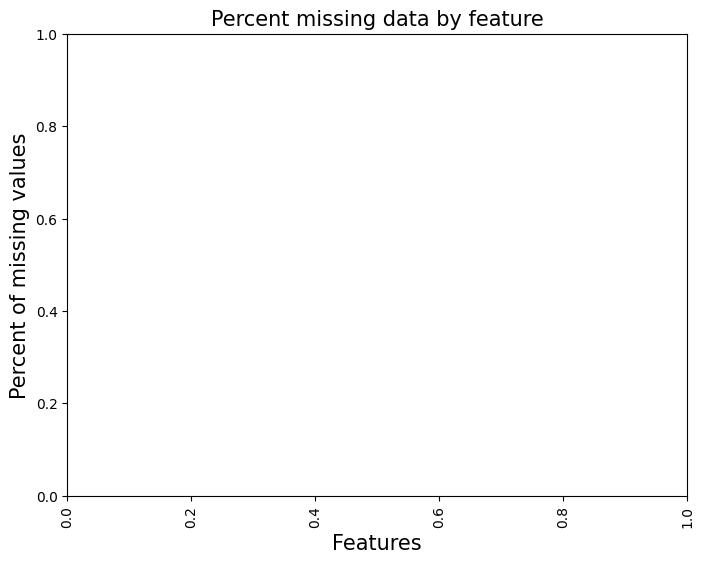

In [13]:
datosfaltantes(train_df) #debería de ser vacía ya que se borró la columna de cabin y se rellenaron los nulos de age y de embark

##Preparar datos previo a entrenar al modelo

In [14]:
all_data = train_df #data frame (datos enseñados en formato de tabla) nueva columna en formato de "all_data".
#Tiene el signo de igual que significa que la nueva columna estará dentro del archivo (o tabla?) de train_df. Se modifica esa tabla train_df
#Modifica datos en el origen train_df

In [15]:
#para saber el tamaño de la familia, sumamos las características SibSp más Parch y al resultado le
#sumamos 1 para considerar al pasajero
all_data['FamiliSize'] = all_data['SibSp'] + all_data['Parch'] + 1

In [16]:
all_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamiliSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


In [17]:
#utilizamos una función para extraer el título del pasajero
import re #regular expressions

def titulo(nombre):
  busca_titulo = re.search(' ([A-Za-z]+)\.',nombre) #lo que está entre comillas es lo que se busca. Se busca un espacio en blanco porque los títulos tienen un espacio antes de empezar
  #después del espacio en blanco es buscar letras de la lista A a Z mayúsculas y minúsculas
  #el + dice que se repita la busqueda de A a Z hasta llegar a un punto (\.) se necesita el \ para decir que es un caracter y no un comando (el comando de .)
  if busca_titulo:
    return busca_titulo.group(1) #después del espacio y antes del punto
    #regresa el grupo 1. Heikkinen, Miss. Laina. heikkinen es grupo 0, Miss es grupo 1 y Laina es grupo 2. Que grupo de letras va a regresar.
  return ""


In [18]:
all_data["Title"] = all_data["Name"].apply(titulo) #dice que aplique la función titulo a la columna número y se presetnará en la columna Title


In [19]:
all_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamiliSize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [20]:
#cambiar el error mlle y cambiarlo por miss y cambiar ms por miss y cambiar mme por miss
all_data['Title'] = all_data['Title'].replace('Mlle','Miss')
all_data['Title'] = all_data['Title'].replace('Ms','Miss')
all_data['Title'] = all_data['Title'].replace('Mme','Miss')

In [21]:
all_data['Title'] = all_data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',\
                                               'Major','Rev','Sir','Jonkheer','Dona'],'Rare') #\ es para romper el renglón
# los corchetes [] son para alistar los elementos los cuales vamos a cambiar a Rare
#one hot encoder es preparar los datos y transformarlos para guardarlos en valores de 0 y 1
#más precisión y velocidad

##Feature Engineering
one hot encoder es preparar los datos y transformarlos para guardarlos en valores de 0 y 1. más precisión y velocidad

In [22]:
#nueva columna es age_bin
all_data['Age_bin']= pd.cut(all_data['Age'], bins = [0,14,20,40,140],labels=['Children','Teenager','Adult','Elder'])
#separar los datos de Age en nombres con rangos de 0 a 14 a 20 a 40 a 140.
#los unos y zeros van a decidir si los personajes están dentro de esa edad
#label le pone nombre a los rangos de edades
#bins significa poner las edades en esas categorías. pd.cut es el comando para cortar los valores de age
#cambia grupos de edades y le pone etiquetas

In [23]:
all_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamiliSize,Title,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,Adult


In [24]:
all_data['Fare_bin']= pd.cut(all_data['Fare'], bins = [0,7.91,14.45,31,120], labels=['Low_fare','Median_fare','Average_fare','High_fare'])
# ponerle etiquetas a los precios que bagaron por el boleto

In [25]:
all_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamiliSize,Title,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr,Adult,Low_fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,Adult,High_fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss,Adult,Median_fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs,Adult,High_fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr,Adult,Median_fare


In [26]:
drop_column = ['Age','Fare','Ticket','Name','PassengerId','SibSp','Parch'] #Borra estas columnas; no nos sirven para nuestro análisis
train_df.drop(drop_column,axis=1, inplace = True) #borra axis=1 es columnas. axis=0 es horizontales (rows)
#inplace es que se va a modificar dentro del mismo data frame

In [27]:
train_df = pd.get_dummies(train_df, columns = ["Sex","Title","Age_bin","Fare_bin","Embarked"], #si hay coma (fuera de corchetes) no se necesita \ para saltar linea
                          prefix=["Sex","Title","Age_Type","Fare_Type","Em_Type"])
#get dummies es convertir valores categóricos a valores numéricos (0,1) es (false,true)
#creara columnas para cada valor del que se puede definir si es verdadero o falso

In [28]:
train_df.head() #el default es 5

,Survived,Pclass,FamiliSize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,...,Age_Type_Teenager,Age_Type_Adult,Age_Type_Elder,Fare_Type_Low_fare,Fare_Type_Median_fare,Fare_Type_Average_fare,Fare_Type_High_fare,Em_Type_C,Em_Type_Q,Em_Type_S
0,0,3,2,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
1,1,1,2,True,False,False,False,False,True,False,...,False,True,False,False,False,False,True,True,False,False
2,1,3,1,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,1,1,2,True,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True
4,0,3,1,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True


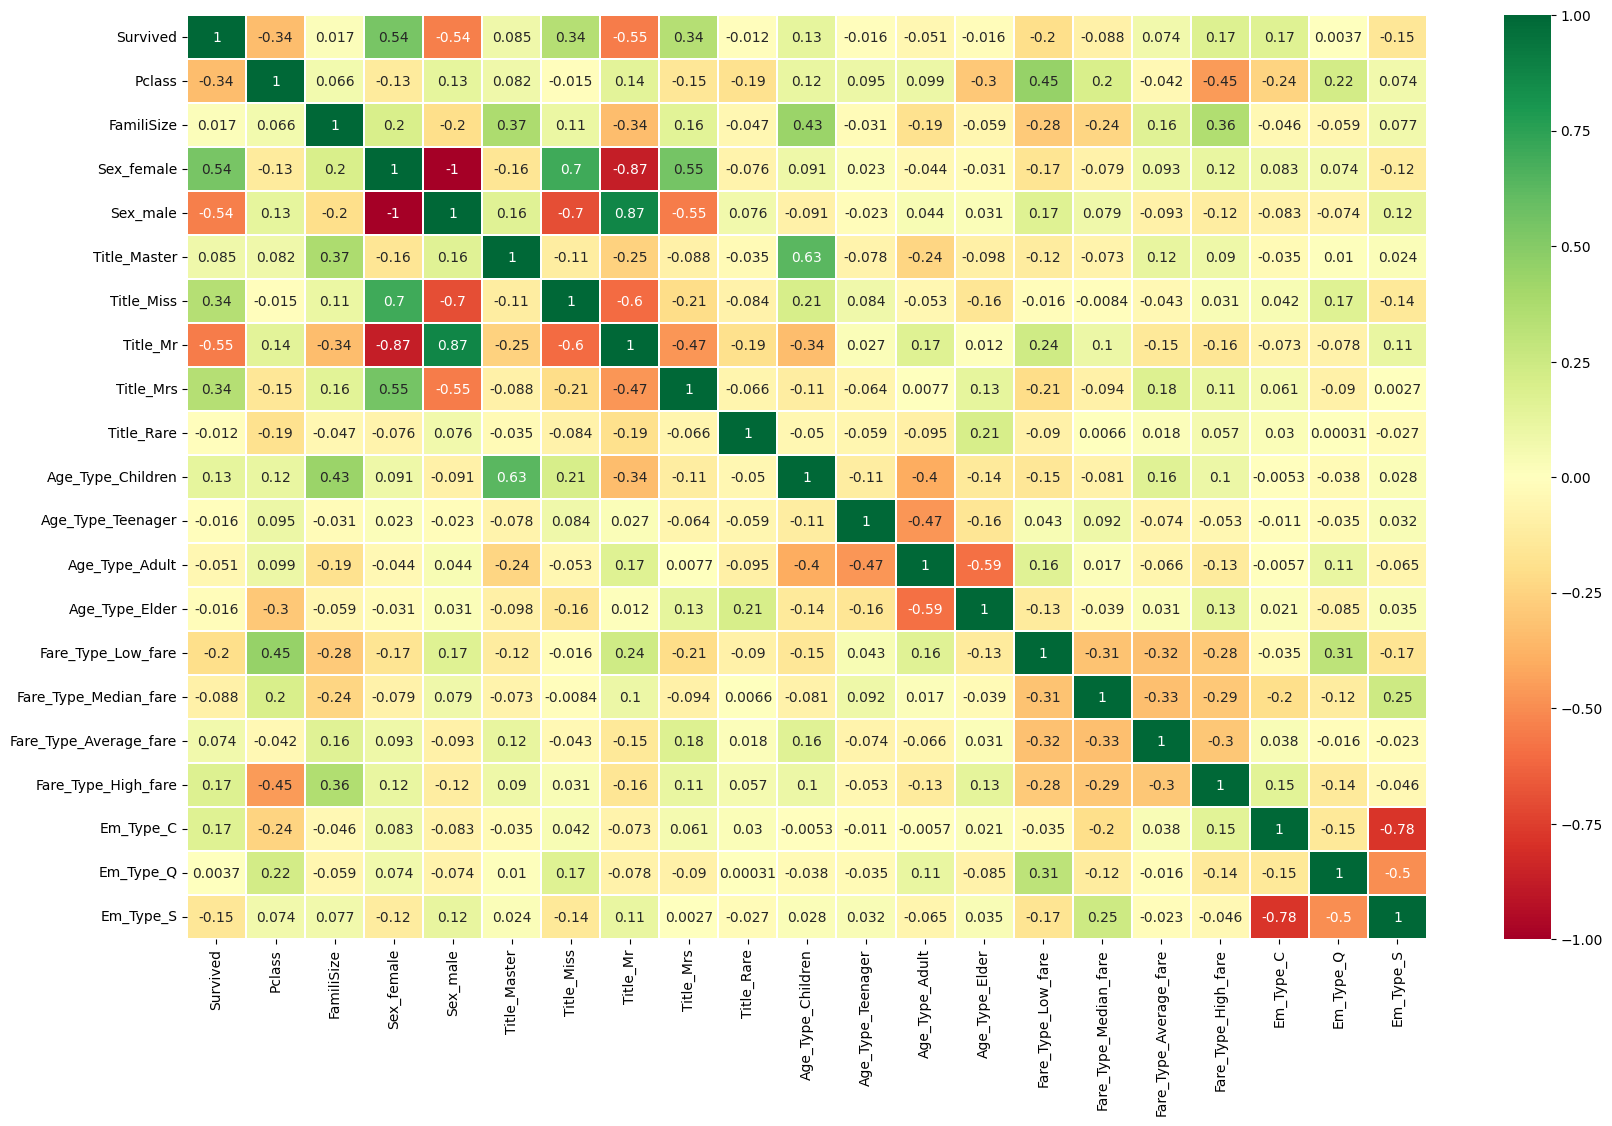

In [29]:
#Crear heatmap para ver correlación de variables con otras
sns.heatmap(train_df.corr(), annot = True, cmap = 'RdYlGn',linewidths=0.2) # RdYlGn = Red Yellow Green ;;Another color is Spectral
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()